In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import paths

# TODO: Deleteme after developing
%load_ext autoreload
%autoreload 2

## Params

In [2]:
ORG_NAME = 'Decentraland'
SPLITS_FREQ = 'W-THU'  # Split weekly
LAST_FOLDS = 10  # Use just last 10 splits
SPLITS_NORMALIZE = True
LAST_FOLD_DATE_STR: str = '2023-07-13'

# Specific to this notebook
MODEL_NAMES = [
    'itemknn',
    'userknn',
    'plnsim',
]
NEEDED_COLS = [
    'time_train',
    'time_rec',
    'time_eval',
]

In [3]:
# Parameters
EXECUTION_ID = "2024-09-04T10:00"
ORG_NAME = "Frax"
SPLITS_FREQ = "5d"
LAST_FOLDS = 10
SPLITS_NORMALIZE = True
LAST_FOLD_DATE_STR = "2022-05-26"


## Read baselines

In [4]:
dfo = paths.load_openpop(ORG_NAME, SPLITS_FREQ, SPLITS_NORMALIZE)
dfo

,precision@1,precision@3,precision@5,precision@10,precision@15,precision@100,ndcg@1,ndcg@3,ndcg@5,ndcg@10,...,recall@10,recall@15,recall@100,r-precision@1,r-precision@3,r-precision@5,r-precision@10,r-precision@15,r-precision@100,time_eval
fold,,,,,,,,,,,,,,,,,,,,,
2021-02-10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.071402
2021-02-15,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.070592
2021-02-20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.068729
2021-02-25,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.070446
2021-03-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.070438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-25,0.375000,0.125000,0.075000,0.037500,0.025000,0.003750,0.315789,0.176126,0.146656,0.146656,...,0.130729,0.130729,0.130729,0.348611,0.348611,0.348611,0.348611,0.348611,0.348611,0.131144
2023-06-30,0.709677,0.430108,0.258065,0.129032,0.086022,0.012903,0.709677,0.892851,0.892851,0.892851,...,1.000000,1.000000,1.000000,0.795455,1.000000,1.000000,1.000000,1.000000,1.000000,0.125081
2023-07-05,1.000000,0.333333,0.200000,0.100000,0.066667,0.010000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.116488


In [5]:
dfp = paths.load_perfect(ORG_NAME, SPLITS_FREQ, SPLITS_NORMALIZE)
dfp

,precision@1,precision@3,precision@5,precision@10,precision@15,precision@100,ndcg@1,ndcg@3,ndcg@5,ndcg@10,...,recall@10,recall@15,recall@100,r-precision@1,r-precision@3,r-precision@5,r-precision@10,r-precision@15,r-precision@100,time_eval
fold,,,,,,,,,,,,,,,,,,,,,
2021-02-10,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.072183
2021-02-15,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.072996
2021-02-20,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.071916
2021-02-25,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.074930
2021-03-02,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.074519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-25,1.0,0.728070,0.568421,0.284211,0.189474,0.028421,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.535526,0.856579,1.0,1.0,1.0,1.0,0.140534
2023-06-30,1.0,0.430108,0.258065,0.129032,0.086022,0.012903,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.854839,1.000000,1.0,1.0,1.0,1.0,0.131025
2023-07-05,1.0,0.333333,0.200000,0.100000,0.066667,0.010000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.000000,1.000000,1.0,1.0,1.0,1.0,0.121344


## Get other model results

In [6]:
x = paths.load_openpop(ORG_NAME, SPLITS_FREQ, SPLITS_NORMALIZE).assign(model_name='openpop')
x

,precision@1,precision@3,precision@5,precision@10,precision@15,precision@100,ndcg@1,ndcg@3,ndcg@5,ndcg@10,...,recall@15,recall@100,r-precision@1,r-precision@3,r-precision@5,r-precision@10,r-precision@15,r-precision@100,time_eval,model_name
fold,,,,,,,,,,,,,,,,,,,,,
2021-02-10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.071402,openpop
2021-02-15,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.070592,openpop
2021-02-20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.068729,openpop
2021-02-25,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.070446,openpop
2021-03-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.070438,openpop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-25,0.375000,0.125000,0.075000,0.037500,0.025000,0.003750,0.315789,0.176126,0.146656,0.146656,...,0.130729,0.130729,0.348611,0.348611,0.348611,0.348611,0.348611,0.348611,0.131144,openpop
2023-06-30,0.709677,0.430108,0.258065,0.129032,0.086022,0.012903,0.709677,0.892851,0.892851,0.892851,...,1.000000,1.000000,0.795455,1.000000,1.000000,1.000000,1.000000,1.000000,0.125081,openpop
2023-07-05,1.000000,0.333333,0.200000,0.100000,0.066667,0.010000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.116488,openpop


In [7]:
def load_all_results_from_suffix(suffix, perfect=False, openpop=True):
    df = pd.concat((
        paths.get_model_results(
            f'{mn}-best-{suffix}', 
            ORG_NAME, 
            SPLITS_FREQ, 
            SPLITS_NORMALIZE
        ).reset_index().set_index('fold').assign(model_name=mn,results_suffix=suffix) for mn in MODEL_NAMES))
    assert not df.empty
    if openpop:
        openpop = paths.load_openpop(ORG_NAME, SPLITS_FREQ, SPLITS_NORMALIZE).assign(model_name='openpop')
        openpop = openpop.loc[df.index.unique()]
        df = pd.concat((df, openpop))
    if perfect:
        df = pd.concat((df, paths.load_perfect(ORG_NAME, SPLITS_FREQ, SPLITS_NORMALIZE).assign(model_name='perfect')))
    return df #.dropna(axis='columns')

_ = load_all_results_from_suffix('test')
print(_.columns)
# _[_['map@15'].isna()]
_

Index(['k', 'window_size', 'fold_t', 'time_train', 'time_rec',
       'open_proposals', 'min_recs', 'avg_recs', 'precision@1', 'precision@3',
       'precision@5', 'precision@10', 'precision@15', 'precision@100',
       'ndcg@1', 'ndcg@3', 'ndcg@5', 'ndcg@10', 'ndcg@15', 'ndcg@100', 'map@1',
       'map@3', 'map@5', 'map@10', 'map@15', 'map@100', 'recall@1', 'recall@3',
       'recall@5', 'recall@10', 'recall@15', 'recall@100', 'r-precision@1',
       'r-precision@3', 'r-precision@5', 'r-precision@10', 'r-precision@15',
       'r-precision@100', 'time_eval', 'model_name', 'results_suffix',
       'rec_users'],
      dtype='object')


,k,window_size,fold_t,time_train,time_rec,open_proposals,min_recs,avg_recs,precision@1,precision@3,...,r-precision@1,r-precision@3,r-precision@5,r-precision@10,r-precision@15,r-precision@100,time_eval,model_name,results_suffix,rec_users
fold,,,,,,,,,,,,,,,,,,,,,
2022-04-16,1.0,14d,2022-04-16,0.001133,0.013262,5.0,2.0,4.000000,0.727273,0.515152,...,0.458333,0.666667,0.716667,0.716667,0.716667,0.716667,0.128035,itemknn,test,NaN
2022-04-21,15.0,7d,2022-04-21,0.001124,0.009965,1.0,1.0,1.000000,1.000000,0.333333,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.124874,itemknn,test,NaN
2022-04-26,10.0,7d,2022-04-26,0.001151,0.026358,2.0,1.0,1.500000,0.653846,0.371795,...,0.911765,1.000000,1.000000,1.000000,1.000000,1.000000,0.128736,itemknn,test,NaN
2022-05-01,7.0,7d,2022-05-01,0.005849,0.018716,2.0,1.0,1.500000,0.833333,0.425926,...,0.833333,1.000000,1.000000,1.000000,1.000000,1.000000,0.127412,itemknn,test,NaN
2022-05-06,4.0,7d,2022-05-06,0.001351,0.006023,2.0,1.0,1.750000,1.000000,0.583333,...,0.625000,1.000000,1.000000,1.000000,1.000000,1.000000,0.126045,itemknn,test,NaN
2022-05-11,1.0,7d,2022-05-11,0.001423,0.008449,2.0,2.0,2.000000,0.500000,0.500000,...,0.500000,1.000000,1.000000,1.000000,1.000000,1.000000,0.126825,itemknn,test,NaN
2022-05-16,1.0,60d,2022-05-16,0.001435,0.009543,1.0,1.0,1.000000,1.000000,0.333333,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.122234,itemknn,test,NaN
2022-05-21,3.0,14d,2022-05-21,0.001143,0.022826,3.0,1.0,1.714286,0.523810,0.333333,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.125971,itemknn,test,NaN
2022-05-26,15.0,7d,2022-05-26,0.001490,0.012568,1.0,1.0,1.000000,1.000000,0.333333,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.123995,itemknn,test,NaN


In [8]:
# Using the hparams that optimize the average results
rdf_avg = load_all_results_from_suffix('avg')
# Using the hparams that optimize that fold
rdf_val = load_all_results_from_suffix('val')
# Using the hparams that optimized the previous fold on the next fold (CVTT)
rdf_test = load_all_results_from_suffix('test')
rdf_test

,k,window_size,fold_t,time_train,time_rec,open_proposals,min_recs,avg_recs,precision@1,precision@3,...,r-precision@1,r-precision@3,r-precision@5,r-precision@10,r-precision@15,r-precision@100,time_eval,model_name,results_suffix,rec_users
fold,,,,,,,,,,,,,,,,,,,,,
2022-04-16,1.0,14d,2022-04-16,0.001133,0.013262,5.0,2.0,4.000000,0.727273,0.515152,...,0.458333,0.666667,0.716667,0.716667,0.716667,0.716667,0.128035,itemknn,test,NaN
2022-04-21,15.0,7d,2022-04-21,0.001124,0.009965,1.0,1.0,1.000000,1.000000,0.333333,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.124874,itemknn,test,NaN
2022-04-26,10.0,7d,2022-04-26,0.001151,0.026358,2.0,1.0,1.500000,0.653846,0.371795,...,0.911765,1.000000,1.000000,1.000000,1.000000,1.000000,0.128736,itemknn,test,NaN
2022-05-01,7.0,7d,2022-05-01,0.005849,0.018716,2.0,1.0,1.500000,0.833333,0.425926,...,0.833333,1.000000,1.000000,1.000000,1.000000,1.000000,0.127412,itemknn,test,NaN
2022-05-06,4.0,7d,2022-05-06,0.001351,0.006023,2.0,1.0,1.750000,1.000000,0.583333,...,0.625000,1.000000,1.000000,1.000000,1.000000,1.000000,0.126045,itemknn,test,NaN
2022-05-11,1.0,7d,2022-05-11,0.001423,0.008449,2.0,2.0,2.000000,0.500000,0.500000,...,0.500000,1.000000,1.000000,1.000000,1.000000,1.000000,0.126825,itemknn,test,NaN
2022-05-16,1.0,60d,2022-05-16,0.001435,0.009543,1.0,1.0,1.000000,1.000000,0.333333,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.122234,itemknn,test,NaN
2022-05-21,3.0,14d,2022-05-21,0.001143,0.022826,3.0,1.0,1.714286,0.523810,0.333333,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.125971,itemknn,test,NaN
2022-05-26,15.0,7d,2022-05-26,0.001490,0.012568,1.0,1.0,1.000000,1.000000,0.333333,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.123995,itemknn,test,NaN


In [9]:
assert rdf_avg.index.nunique() == rdf_val.index.nunique() == rdf_test.index.nunique()+1

<Axes: xlabel='fold', ylabel='map@10'>

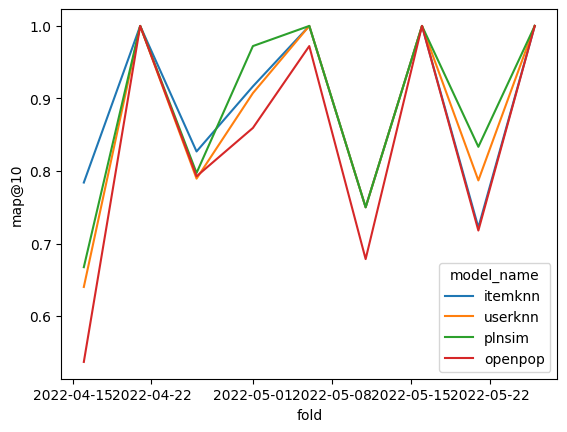

In [10]:
sns.lineplot(rdf_test.reset_index(), x='fold', y='map@10', hue='model_name')

In [11]:
model_suffixes = [
    'avg', # Using the hparams that optimize the average results
    'test', # Using the hparams that optimize that fold
    'valid', # Using the hparams that optimized the previous fold on the next fold (CVTT)
]

In [12]:
paths.get_model_results(MODEL_NAMES[0]+'-best-val', ORG_NAME, SPLITS_FREQ, SPLITS_NORMALIZE)

,,,fold_t,time_train,time_rec,open_proposals,min_recs,avg_recs,precision@1,precision@3,precision@5,precision@10,...,recall@10,recall@15,recall@100,r-precision@1,r-precision@3,r-precision@5,r-precision@10,r-precision@15,r-precision@100,time_eval
fold,k,window_size,,,,,,,,,,,,,,,,,,,,,
2022-04-11,1,14d,2022-04-11,0.001106,0.002922,1,1.0,1.00,1.000000,0.333333,0.200000,0.100000,...,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,0.118867
2022-04-16,15,7d,2022-04-16,0.001273,0.006999,5,2.0,2.80,0.800000,0.533333,0.360000,0.180000,...,1.0,1.0,1.0,0.625000,0.8,0.8,0.8,0.8,0.8,0.127544
2022-04-21,10,7d,2022-04-21,0.001105,0.010020,1,1.0,1.00,1.000000,0.333333,0.200000,0.100000,...,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,0.124751
2022-04-26,7,7d,2022-04-26,0.002919,0.026299,2,1.0,1.50,0.653846,0.371795,0.223077,0.111538,...,1.0,1.0,1.0,0.911765,1.0,1.0,1.0,1.0,1.0,0.128148
2022-05-01,4,7d,2022-05-01,0.002811,0.018656,2,1.0,1.50,0.833333,0.425926,0.255556,0.127778,...,1.0,1.0,1.0,0.833333,1.0,1.0,1.0,1.0,1.0,0.127912
2022-05-06,1,7d,2022-05-06,0.001259,0.006049,2,1.0,1.75,1.000000,0.583333,0.350000,0.175000,...,1.0,1.0,1.0,0.625000,1.0,1.0,1.0,1.0,1.0,0.127030
2022-05-11,1,60d,2022-05-11,0.001436,0.019350,2,2.0,2.00,0.928571,0.428571,0.257143,0.128571,...,1.0,1.0,1.0,0.846154,1.0,1.0,1.0,1.0,1.0,0.126361
2022-05-16,3,14d,2022-05-16,0.004050,0.004829,1,1.0,1.00,1.000000,0.333333,0.200000,0.100000,...,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,0.123170
2022-05-21,15,7d,2022-05-21,0.002326,0.019089,3,1.0,1.50,0.611111,0.333333,0.200000,0.100000,...,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,0.126491
